# 2000 2P6 Q1

(a) The function $p(t)$ is a pulse of unit magnitude, commencing at $t=0$ and of duration $\tau$ seconds. By considering $p(t)$ as a combination of two step inputs, find its Laplace transform $\bar{p}(s)$. 

(b) Figure 1 shows a simple mixer vessel in which the contents are perfectly mixed at all times. Solvent flows in at a constant rate $Q~\mathrm{m~s^{-1}}$. The solution leaves the vessel at the same rate so that the volume $V~\mathrm{m^3}$ of liquid in the vessel emains constant. A soluble solid is added at a varying rate $m(t)~\mathrm{kg~s^{-1}}$ and dissolves rapidly without any significant increase in the solution volume. 

If $c(t)~\mathrm{kg~m^{-3}}$ is the concentration of the dissolved solids in the vessel at time $t$, show that the differential equation relating $c(t)$ to $m(t)$ is:

$$\frac{\mathrm{d}c}{\mathrm{d}t} + \frac{Qc}{V} = \frac{m}{V}$$

(c) If $m(t)=m_0 p(t)$ from part (a) with $\tau = 10~\mathrm{s}$ and $m_0 = 0.01~\mathrm{kg~s^{-1}}$, and if $c(0) = 0$, $V=2~\mathrm{m^3}$ and $Q = 0.02~\mathrm{m^3~s^{-1}}$, obtain an expression for the concentration $c(t)$. 

<center>
    <figure>
        <img src="images/2000_2P6_Q1_Fig_1.png"
            alt="Figure 1">
        <figcaption>Figure 1</figcaption>
    </figure>
</center>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Part (a)

$p(t)$ is the superposition of two step functions, $p(t) = H(t) - H(t-\tau)$. 

Take the Laplace transform:
$$\mathcal{L} \{ H(t) - H(t-\tau) \} = \frac{1}{s} + \frac{1}{s}e^{-s\tau}$$
$$\mathcal{L} \{ H(t) - H(t-\tau) \} = \frac{1}{s}(1 + e^{-s\tau})$$

### Part (b)

The mass of solid in the tank is given by $cV$. The rate of change of mass in the tank is equal to the mass in $m$ minus the mass out $cQ$. 
Because $V$ is a constant, we have the rate of change of mass in the tank as $V\frac{\mathrm{d}c}{\mathrm{d}t}$. 
Hence, 
$$V\frac{\mathrm{d}c}{\mathrm{d}t} = m - cQ$$
$$\frac{\mathrm{d}c}{\mathrm{d}t} + \frac{Qc}{V} = \frac{m}{V}$$

### Part (c) (Analytical)

By taking Laplace transforms of the equation above, we have
$$s\bar{c}(s) + \frac{Q}{V}\bar{c} = \frac{m_0}{V} \left(\frac{1}{s}(1+e^{-s\tau})\right)$$

Let $\frac{V}{Q} = T$ be a time constant and isolate $\bar{c}(s)$
$$\bar{c}(s) = \frac{m_0}{Q} \left(\frac{1+e^{-s\tau}}{s(sT+1)}\right)$$

Then, taking the equation back to the time domain, we have:
$$c(t) = \frac{m_0}{Q} \left[(1-e^{-t/T})-(H(t-\tau) - e^{(t-\tau)/T}) \right]$$

Finally, substituting values $\tau = 10~\mathrm{s}$ and $m_0 = 0.01~\mathrm{kg~s^{-1}}$, and if $c(0) = 0$, $V=2~\mathrm{m^3}$ and $Q = 0.02~\mathrm{m^3~s^{-1}}$, we have:
$$c(t) = \frac{0.01~\mathrm{kg~s^{-1}}}{0.02~\mathrm{m^3~s^{-1}}} \left[(1-e^{-\frac{t}{\mathrm{100~s}}})-(H(t-\mathrm{10~s}) - e^{\frac{t-\mathrm{10~s}}{\mathrm{100~s}}}) \right]$$
$$c(t) = 0.5~\mathrm{kg~m^{-3}} \left[(1-e^{-\frac{t}{\mathrm{100~s}}})-(H(t-\mathrm{10~s}) - e^{\frac{t-\mathrm{10~s}}{\mathrm{100~s}}}) \right]$$

It is also evident that the equation is dimensionally correct, so therefore this answer is plausible. 

In the next section, we will solve the differential equation numerically to show that the above analytical solution is true. 

### Part (c), (d) (Simulation)
If $\frac{\mathrm{d}c}{\mathrm{d}t} = \frac{m}{V} - \frac{Qc}{V}$, 
$$c(t_{i+1}) = c(t_i) + \left( \frac{m - Qc(t_i)}{V}\right) \Delta t$$

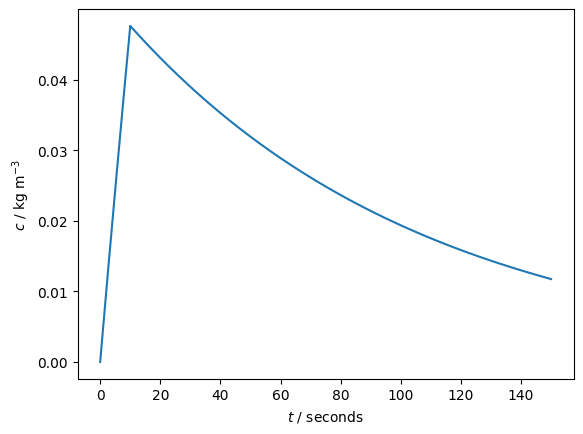

In [2]:
'''Define constants'''
m0 = 0.01
tau = 10
Q = 0.02 
V = 2

'''Create array of times'''
dt = 0.005
t_array = np.arange(0, 150, dt)

'''Euler integration'''
def concentration_num(c_0 = 0):
    c = c_0 
    
    # initialise empty lists to record concentrations
    c_list = []

    # Euler integration 
    for i in range(len(t_array)):
        
        # append current state to c_list
        c_list.append(c)

        # determine m 
        if t_array[i] <= tau:
            m = m0
        else:
            m = 0

        # calculate new concentration
        c = c + (m - Q*c)/V*dt

    return c_list

'''Plot results'''
def concentration_plot_1():
    plt.plot(t_array, concentration_num())
    plt.xlabel('$t$ / seconds')
    plt.ylabel('$c$ / kg m$^{-3}$')

concentration_plot_1()

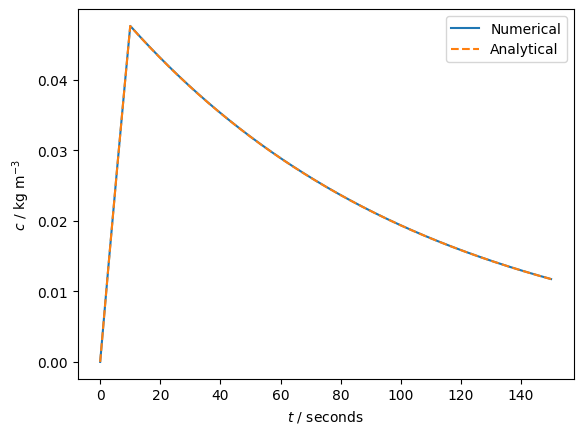

In [3]:
'''Analytical concentration '''
# time constant 
T = V/Q

def concentration_ana():

    # initialise empty lists to record concentrations
    c_list = []
    
    for t in t_array:
        if t <= tau:
            c = m0/Q * (1 - np.exp(-t/T))
        else:
            c = m0/Q * (1 - np.exp(-t/T)) - m0/Q * (1 - np.exp(-(t-tau)/T))

        c_list.append(c)

    return c_list

'''Plot results'''
def concentration_plot_2():
    plt.plot(t_array, concentration_num(), label = 'Numerical')
    plt.plot(t_array, concentration_ana(), label = 'Analytical', linestyle='dashed')
    plt.xlabel('$t$ / seconds')
    plt.ylabel('$c$ / kg m$^{-3}$')
    plt.legend()

concentration_plot_2()

As we can see, the analytical solution and the numerical solution line up. Therefore, we can conclude that the analytical solution derived is probably right. 

Finally, we will plug in $t = 5~\mathrm{s}$ and $t = 100~\mathrm{s}$ into our equation to find the corresponding values required by part (d) of the question. 

In [4]:
'''When t = 5 s, calculate concentration of solution'''

t_5 = min(abs(t_array - 5)) + 5
idx_5 = list(t_array).index(t_5)
c_5 = concentration_ana()[idx_5]

'''When t = 100 s, calculate concentration of solution'''

t_100 = min(abs(t_array - 100)) + 100
idx_100 = list(t_array).index(t_100)
c_100 = concentration_ana()[idx_100]

print(f'When t = 5 s, concentration = {round(c_5, 3)}')
print(f'When t = 100 s, concentration = {round(c_100, 3)}')

When t = 5 s, concentration = 0.024
When t = 100 s, concentration = 0.019
